# Danang Kurniawan
## Final Projects Big Data Analytics II


Dalam project ini menggunakan data "Sample-Superstore" dimana data dapat diunduh pada link <a href="https://community.tableau.com/docs/DOC-10198">https://community.tableau.com/docs/DOC-10198p</a> atau di <a href="https://danangkurniawan.s3.amazonaws.com/Sample+-+Superstore.xls">https://danangkurniawan.s3.amazonaws.com/Sample+-+Superstore.xls</a>. Data dalam format csv dan berisi informasi mengenai Order ID ,City, Region,Category,Sub-Categori,dll.

**Part I : Import Library yang akan digunakan serta membuka file csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [3]:
data=pd.read_excel('Sample - Superstore.xls')
data

NameError: name 'pd' is not defined

**Part II : Visualisasi Dasar Data**

Membuat dictionary untuk menghitung jumlah order setiap City

In [58]:
rekap1={}

for row in data['City']:
    if row in rekap1:
        rekap1[row] += 1
    else:
        rekap1[row] = 1
sort= sorted(rekap1.items(), key=operator.itemgetter(1),reverse=True)
sort

[('New York City', 915),
 ('Los Angeles', 747),
 ('Philadelphia', 537),
 ('San Francisco', 510),
 ('Seattle', 428),
 ('Houston', 377),
 ('Chicago', 314),
 ('Columbus', 222),
 ('San Diego', 170),
 ('Springfield', 163),
 ('Dallas', 157),
 ('Jacksonville', 125),
 ('Detroit', 115),
 ('Newark', 95),
 ('Richmond', 90),
 ('Jackson', 82),
 ('Columbia', 81),
 ('Aurora', 68),
 ('Phoenix', 63),
 ('Long Beach', 61),
 ('Arlington', 60),
 ('San Antonio', 59),
 ('Miami', 57),
 ('Louisville', 57),
 ('Rochester', 53),
 ('Charlotte', 52),
 ('Henderson', 51),
 ('Lakewood', 49),
 ('Lancaster', 46),
 ('Fairfield', 45),
 ('Milwaukee', 45),
 ('Denver', 44),
 ('Lawrence', 44),
 ('Baltimore', 43),
 ('Pasadena', 42),
 ('San Jose', 42),
 ('Cleveland', 42),
 ('Fayetteville', 41),
 ('Salem', 40),
 ('Austin', 39),
 ('Atlanta', 39),
 ('Franklin', 37),
 ('Wilmington', 36),
 ('Tampa', 36),
 ('Huntsville', 36),
 ('Decatur', 35),
 ('Tucson', 32),
 ('Toledo', 32),
 ('Concord', 31),
 ('Providence', 31),
 ('Lafayette', 31)

Membuat rekap ulang jumlah order, dimana yang akan dipetakan hanya order yang lebih besar sama dengan 80, kemudian plotting pada pie bar

In [60]:
rekap2 = {}
for key in rekap1:
    if rekap1[key] >=80:
        rekap2[key] = rekap1[key]

rekap2

{'Los Angeles': 747,
 'Seattle': 428,
 'San Francisco': 510,
 'Philadelphia': 537,
 'Houston': 377,
 'New York City': 915,
 'Chicago': 314,
 'Springfield': 163,
 'Jackson': 82,
 'Columbia': 81,
 'Columbus': 222,
 'Newark': 95,
 'Dallas': 157,
 'Detroit': 115,
 'San Diego': 170,
 'Richmond': 90,
 'Jacksonville': 125}

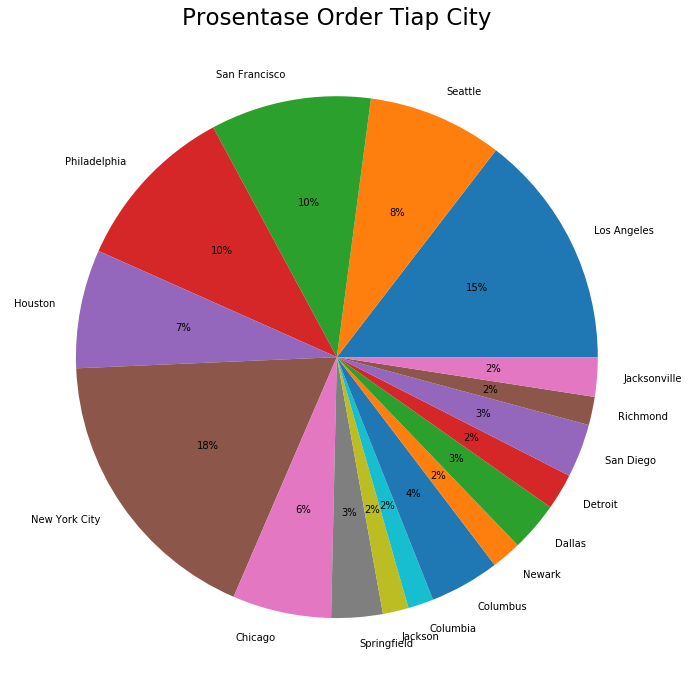

In [64]:
plt.pie(rekap2.values(),autopct='%1.0f%%', labels=rekap2)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Prosentase Order Tiap City', fontsize=23)
plt.show()

Dari pie bar yang ada dapat diketahui bahwa New York City mempunyai jumlah order yang paling besar daripada City yang lain

In [129]:
data2=data.filter(items=['Category','Sales','Quantity','Discount','Profit'])
data2.head()

,Category,Sales,Quantity,Discount,Profit
0,Furniture,261.9600,2,0.00,41.9136
1,Furniture,731.9400,3,0.00,219.5820
2,Office Supplies,14.6200,2,0.00,6.8714
3,Furniture,957.5775,5,0.45,-383.0310
4,Office Supplies,22.3680,2,0.20,2.5164


Text(0.5, 1.0, 'Quantity-Profit')

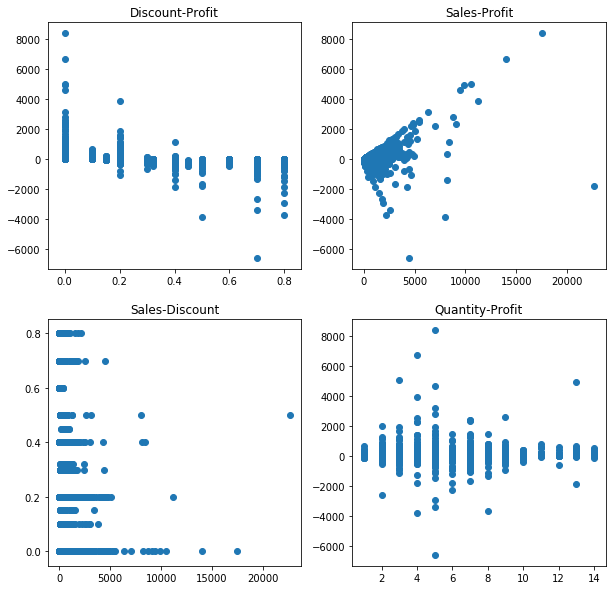

In [143]:
fig, ([ax1, ax2],[ax3,ax4]) = plt.subplots(2, 2)
ax1.scatter(data['Discount'],data['Profit'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax2.scatter(data['Sales'],data['Profit'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax3.scatter(data['Sales'],data['Discount'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax4.scatter(data['Quantity'],data['Profit'])
fig = plt.gcf()
fig.set_size_inches(10,10)

ax1.set_title('Discount-Profit')
ax2.set_title('Sales-Profit')
ax3.set_title('Sales-Discount')
ax4.set_title('Quantity-Profit')

Dari Keempat grafik hubungan yang ada,dipilih grafik hubungan Discount-profit.

Text(0, 0.5, 'Profit')

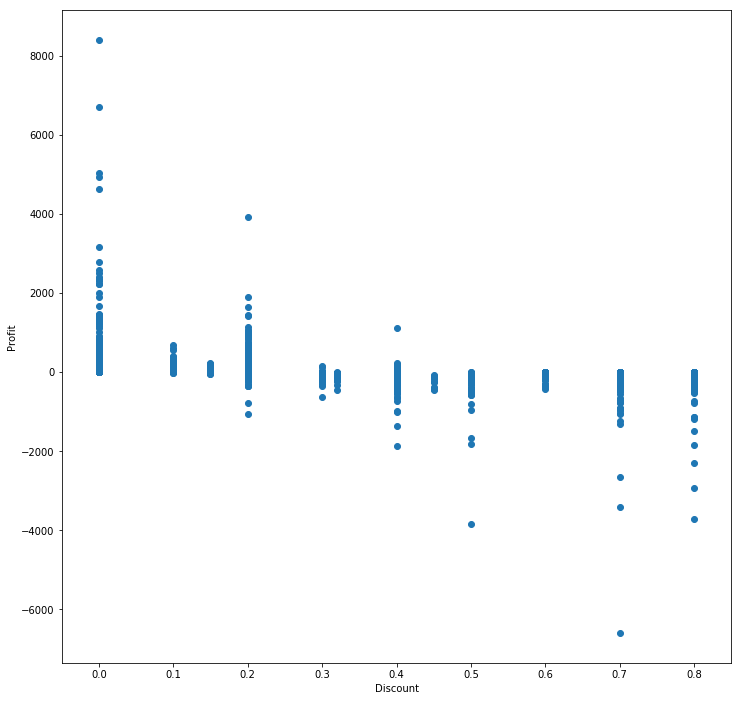

In [135]:
plt.scatter(data['Discount'],data['Profit'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.xlabel('Discount')
plt.ylabel('Profit')

Dilakukan data cleaning dengan menghilangka outlier

In [107]:
discount=data['Discount']
profit=data['Profit']

meandiscount=np.mean(discount)
meanprofit=np.mean(profit)
stddiscount=np.std(discount)
stdprofit=np.std(profit)

dataclean=data[(np.abs((data['Discount']-meandiscount)/stddiscount)<=3) &(np.abs((data['Profit']-meanprofit)/stdprofit)<=3)]


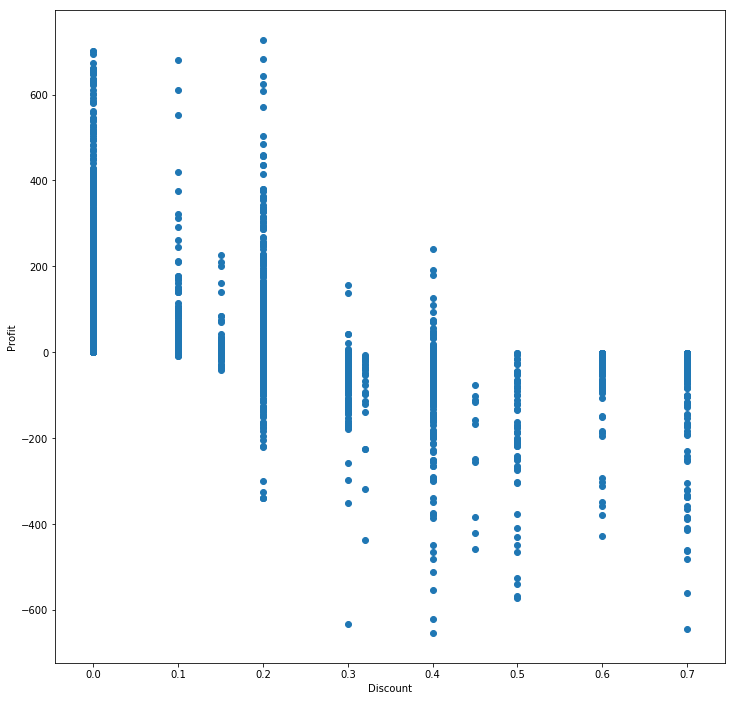

In [108]:
plt.scatter(dataclean['Discount'],dataclean['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
fig = plt.gcf()
fig.set_size_inches(12,12)

Membuat regresi linear dan mencari nilai MAE,MSE,dan R-square

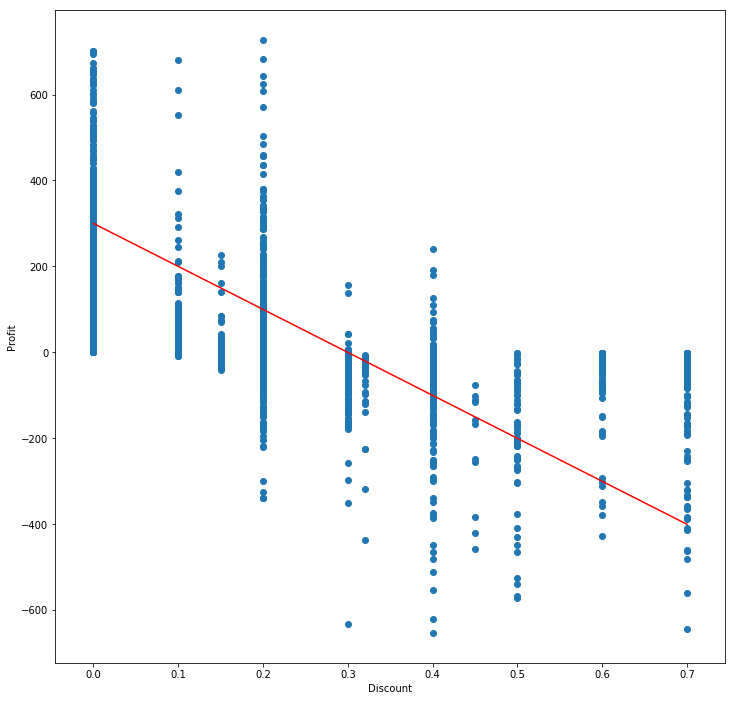

MeanAbsoluteError: 193.1804098607232
MeanSquaredError: 54220.998315677614
R2: -6.064938718275364


In [128]:
x = np.arange(0, 0.7, 0.00007293947)

##You can adjust the slope and intercept to verify the changes in the graph
y =-1000*(x)+300
#plt.figure(figsize=(8,6))
plt.scatter(dataclean['Discount'],dataclean['Profit'])
plt.plot(x,y, 'r') 
plt.xlabel('Discount')
plt.ylabel('Profit')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# hitung mean absolute error
mae = mean_absolute_error(dataclean['Profit'], y)
print("MeanAbsoluteError:", mae)

# hitung mean squared error
mse = mean_squared_error(dataclean['Profit'], y)
print("MeanSquaredError:", mse)

# hitung r2
r2 = r2_score(dataclean['Profit'], y)
print("R2:", r2)

***Part III : Assosiasi**

Menyusun ulang data dan membuat sebuah kerangjang belanjaan berdasarkan Order ID  untuk New York City. Barang yang dibeli oleh Order ID akan bernilai 1 sedangkan jika barang tidak ada maka bernilai 0.

Algoritma Apriori digunakan untuk mengetahui item mana saja yang biasanya dibeli secara bersamaan, sehingga pihak supermarket dapat mengatur tata letak item. dengan demikian diharapkan akan meningkatkan jumlah penjualan item.

In [66]:
basket = (data[data['City'] =="New York City"].groupby(['Order ID', 'Sub-Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID'))
basket.head()

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order ID,,,,,,,,,,,,,,,,,
CA-2014-100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
CA-2014-100328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-100391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
CA-2014-101364,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA-2014-101833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


Dengan melakukan encoding, jika barang sama dengan 0 maka keranjang akan bernilai 0, akan tetapi jika barang terbeli berapapun jumlahnya maka keranjang akan bernilai 1.

In [37]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head()


Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order ID,,,,,,,,,,,,,,,,,
CA-2014-100006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CA-2014-100328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2014-100391,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
CA-2014-101364,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
CA-2014-101833,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Menggunakan tools apriori untuk menghitung itemsets dan supportnya

In [69]:
frequent_itemsets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.126667,(Accessories)
1,0.080000,(Appliances)
2,0.144444,(Art)
3,0.280000,(Binders)
4,0.060000,(Bookcases)


In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Accessories),(Binders),0.126667,0.280000,0.035556,0.280702,1.002506,0.000089,1.000976
1,(Binders),(Accessories),0.280000,0.126667,0.035556,0.126984,1.002506,0.000089,1.000364
2,(Accessories),(Bookcases),0.126667,0.060000,0.008889,0.070175,1.169591,0.001289,1.010943
3,(Bookcases),(Accessories),0.060000,0.126667,0.008889,0.148148,1.169591,0.001289,1.025217
4,(Accessories),(Chairs),0.126667,0.128889,0.017778,0.140351,1.088929,0.001452,1.013333
5,(Chairs),(Accessories),0.128889,0.126667,0.017778,0.137931,1.088929,0.001452,1.013067
6,(Accessories),(Fasteners),0.126667,0.037778,0.008889,0.070175,1.857585,0.004104,1.034843
7,(Fasteners),(Accessories),0.037778,0.126667,0.008889,0.235294,1.857585,0.004104,1.142051
8,(Accessories),(Furnishings),0.126667,0.155556,0.028889,0.228070,1.466165,0.009185,1.093939
9,(Furnishings),(Accessories),0.155556,0.126667,0.028889,0.185714,1.466165,0.009185,1.072515


In [40]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
224,"(Tables, Art)",(Accessories),0.002222,0.126667,0.002222,1.0,7.894737,0.001941,inf
258,"(Binders, Machines)",(Accessories),0.002222,0.126667,0.002222,1.0,7.894737,0.001941,inf
384,"(Fasteners, Tables)",(Accessories),0.004444,0.126667,0.004444,1.0,7.894737,0.003881,inf
419,"(Accessories, Supplies)",(Furnishings),0.002222,0.155556,0.002222,1.0,6.428571,0.001877,inf
432,"(Labels, Machines)",(Accessories),0.002222,0.126667,0.002222,1.0,7.894737,0.001941,inf
456,"(Labels, Tables)",(Accessories),0.002222,0.126667,0.002222,1.0,7.894737,0.001941,inf
540,"(Tables, Art)",(Appliances),0.002222,0.080000,0.002222,1.0,12.500000,0.002044,inf
612,"(Appliances, Labels)",(Chairs),0.004444,0.128889,0.004444,1.0,7.758621,0.003872,inf
634,"(Appliances, Machines)",(Envelopes),0.002222,0.051111,0.002222,1.0,19.565217,0.002109,inf
636,"(Machines, Envelopes)",(Appliances),0.002222,0.080000,0.002222,1.0,12.500000,0.002044,inf
